# Python 4
For this bootcamp we'll be using a few data visualization modules to plot data using Python. 

In this notebook we will:
1. Import required modules and datasets
2. Manipulate the data using Pandas
3. Visualize the data



In [1]:
#Remove warnings from our outputs
import warnings
warnings.filterwarnings("ignore")

%pip install matplotlib
%pip install numpy

# Matplotlib

"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python."

Matplotlib is one of the most popular libraries used to create data vizualizations in Python. It uses an object-oriented API (classes) which we've already worked with when using Pandas

Below is a breakdown of some of the key elements that go into a matplotlib figure

Two main concepts to understand
- A figure is the whole figure and can contain any number of axes (usually at least 1)
- Axes are the "plot" that will contain your title, legend, etc.

<img src="images/mplib_anatomy.png"/>

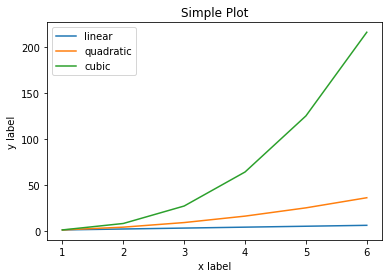

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x  = [1,2,3,4,5,6]

data = np.array(x)

# https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
# Create a figure and an axes.
fig, ax = plt.subplots()

# Plot some data on the axes.
ax.plot(data, data, label='linear')

# Plot more data on the axes...
ax.plot(data, data**2, label='quadratic')

# ... and some more.
ax.plot(data, data**3, label='cubic')

# Add an x-label to the axes.
ax.set_xlabel('x label')

# Add a y-label to the axes.
ax.set_ylabel('y label')

# Add a title to the axes.
ax.set_title("Simple Plot")

# Add a legend.
ax.legend()

#Save our plot as an image
plt.savefig('line_plot.png')


In [4]:
plt.savefig?


# Pandas Plotting
Pandas offers a easy way to access Matplotlib to plot the data inside of a DataFrame.

We will go over a few ways to plot some stock data.


In [5]:
#Import Pandas 
import pandas as pd

#A few configurations
pd.plotting.register_matplotlib_converters()
%matplotlib inline

print("Setup Complete")


Setup Complete


In [6]:
# Import stock data
stock_df = pd.read_csv('data/stocks.csv', index_col="date", parse_dates=True)


In [7]:
#Take a look at the data
stock_df.head()


,AAPL,YUM,ABC,ADI
date,,,,
2017-01-30,121.63,65.68,83.62,76.28
2017-01-31,121.35,65.53,87.28,74.94
2017-02-01,128.75,64.87,88.61,76.17
2017-02-02,128.53,65.67,88.05,75.23
2017-02-03,129.08,66.23,89.28,75.52


<AxesSubplot:xlabel='date'>

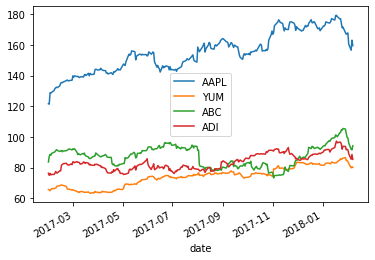

In [8]:
#Plotting data as easy as calling the plot() function
stock_df.plot(kind='line')


<AxesSubplot:title={'center':'Stock Data 2017-2018'}, xlabel='date'>

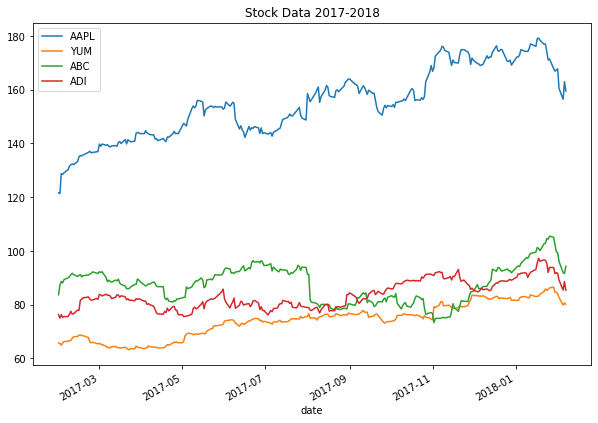

In [9]:
#Plotting data as easy as calling the plot() function
stock_df.plot(kind='line', figsize=(10,7), title='Stock Data 2017-2018')


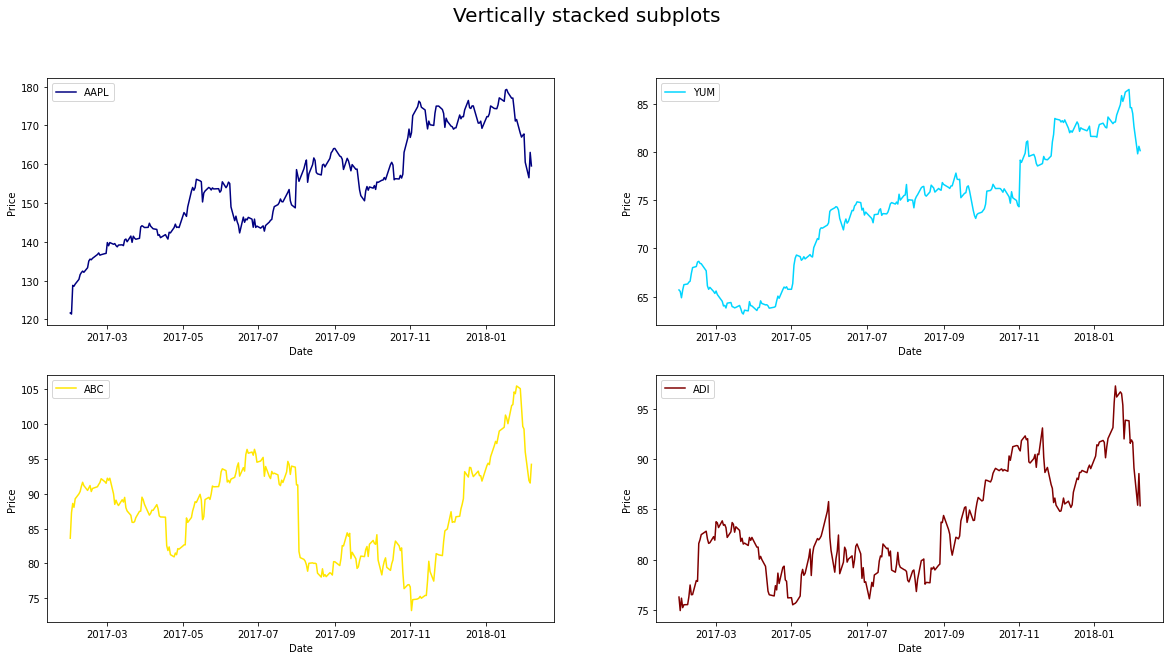

In [10]:
#Define a MPL figure and axes to give us more control of our visual
fig, axs = plt.subplots(2, 2, figsize = (20,10))
fig.suptitle('Vertically stacked subplots', fontsize=20)

#Must specify the axes we want to plot onto, and can specify addicitonal styling parameters with 'colormap'
stock_df.plot(kind='line', subplots=True,  colormap='jet', ax = axs)

#Use a FOR loop to add on the X and Y labels
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Price')


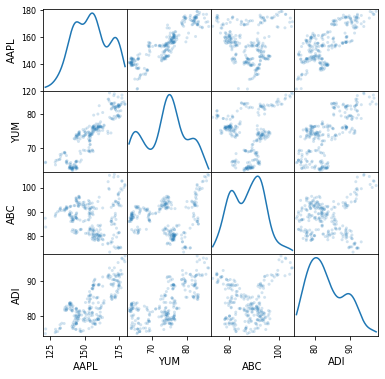

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(stock_df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()


# Barchart
For the next portion of the bootcamp, we're going to be using Airbnb data. 

We'll be going over some of the other kinds of plots we can create directly from a Pandas DataFrame



In [12]:
#https://www.kaggle.com/shivamb/netflix-shows
#Import new dataset from the data/netflix_titles.csv file into variable net_df
net_df = pd.read_csv('data/netflix_titles.csv')


In [13]:
net_df.shape


(5243, 12)

In [15]:
#Calculate the number of movies per country
freq = net_df['country'].value_counts()


<AxesSubplot:title={'center':'Number of Titles per Country'}>

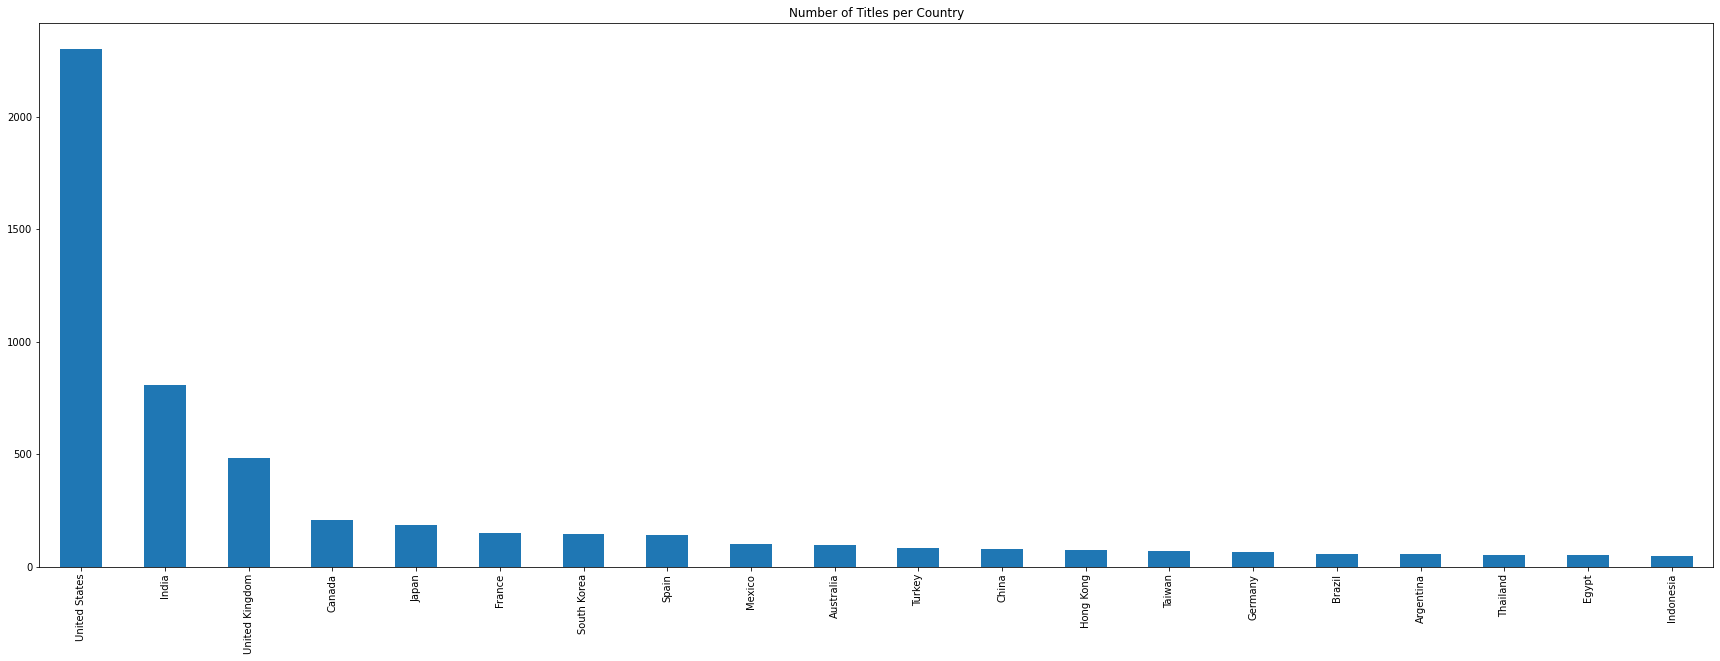

In [16]:
#Plot this data as a bar chart
plt.figure(figsize=(30,10))

freq.plot(kind='bar', title='Number of Titles per Country')


In [17]:
#Create a pivot so we can visualize the data
net_pivot = net_df.pivot_table(values='show_id', index="country", 
                          columns = 'type', aggfunc='count')


In [18]:
#Create new column for sorting
net_pivot['Sum'] = net_pivot['Movie'] + net_pivot['TV Show']


In [19]:
#Sort by new column in decsending order
net_pivot = net_pivot.sort_values('Sum', ascending=False)


In [20]:
#Drop unnecessary column
net_pivot.drop(columns='Sum', inplace=True)


In [21]:
net_pivot.head()


type,Movie,TV Show
country,,
United States,1682,620
India,753,55
United Kingdom,282,201
Canada,130,76
Japan,52,132


<AxesSubplot:xlabel='country'>

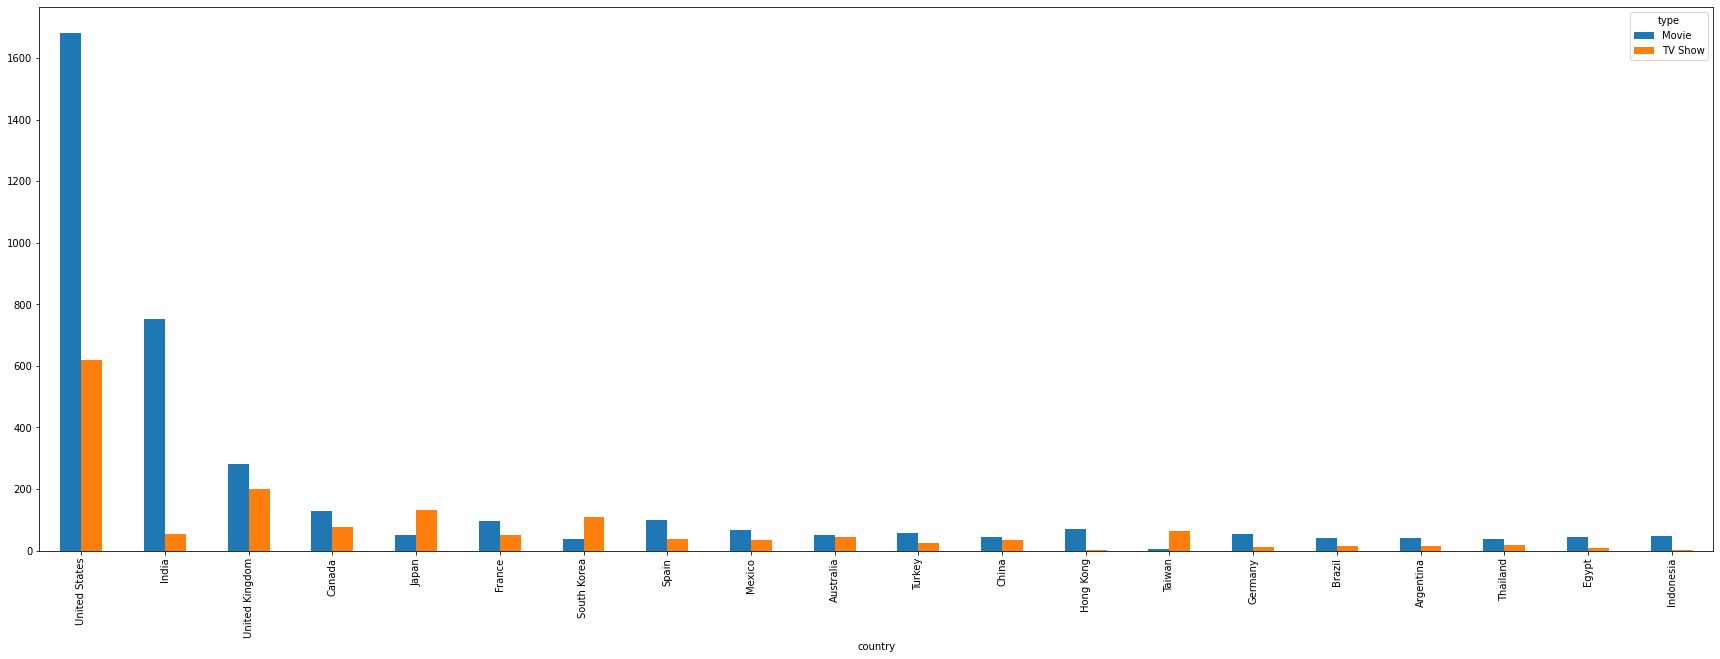

In [22]:
#Create a basic bar chart of the pivot table
net_pivot.plot(kind='bar',figsize=(30,10))


<AxesSubplot:ylabel='country'>

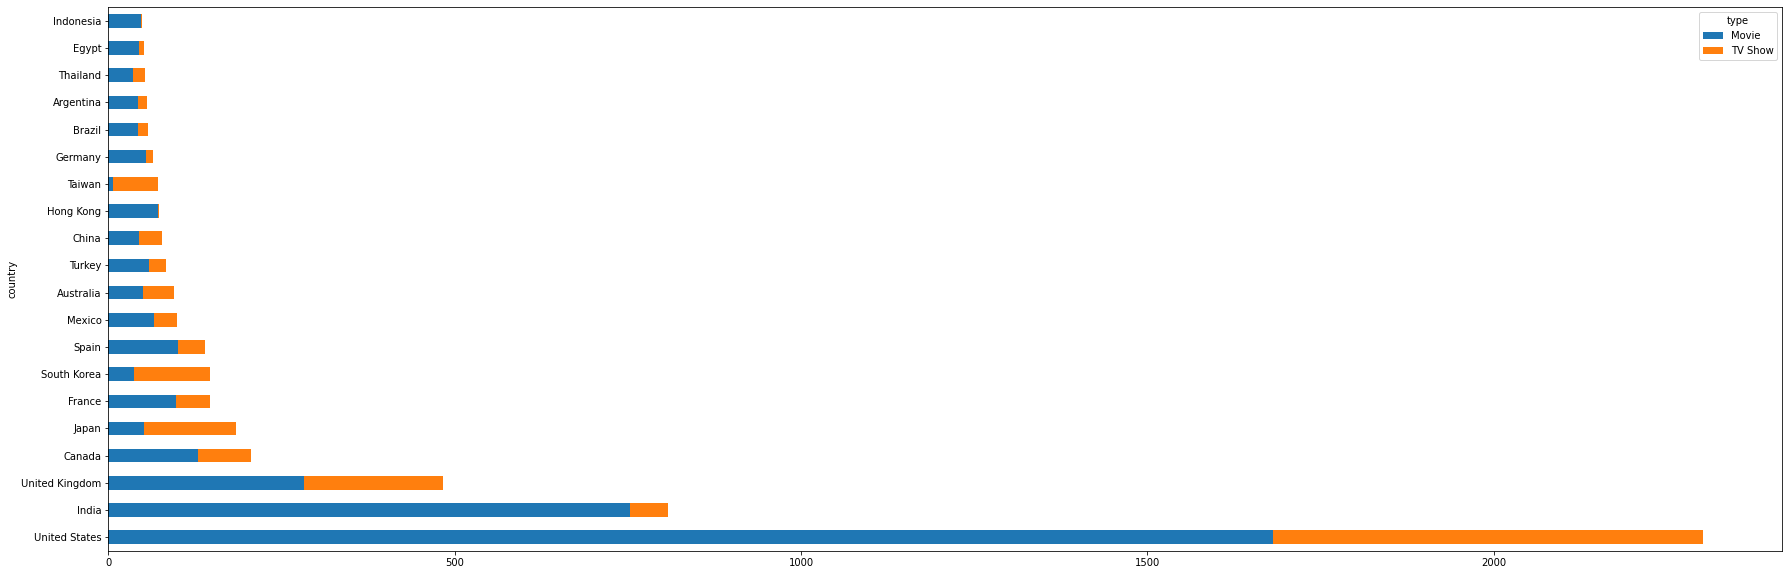

In [23]:
#We can stack the bar chart and change the orientation to horizontal
net_pivot.plot(kind='barh', figsize=(30,10), stacked=True)


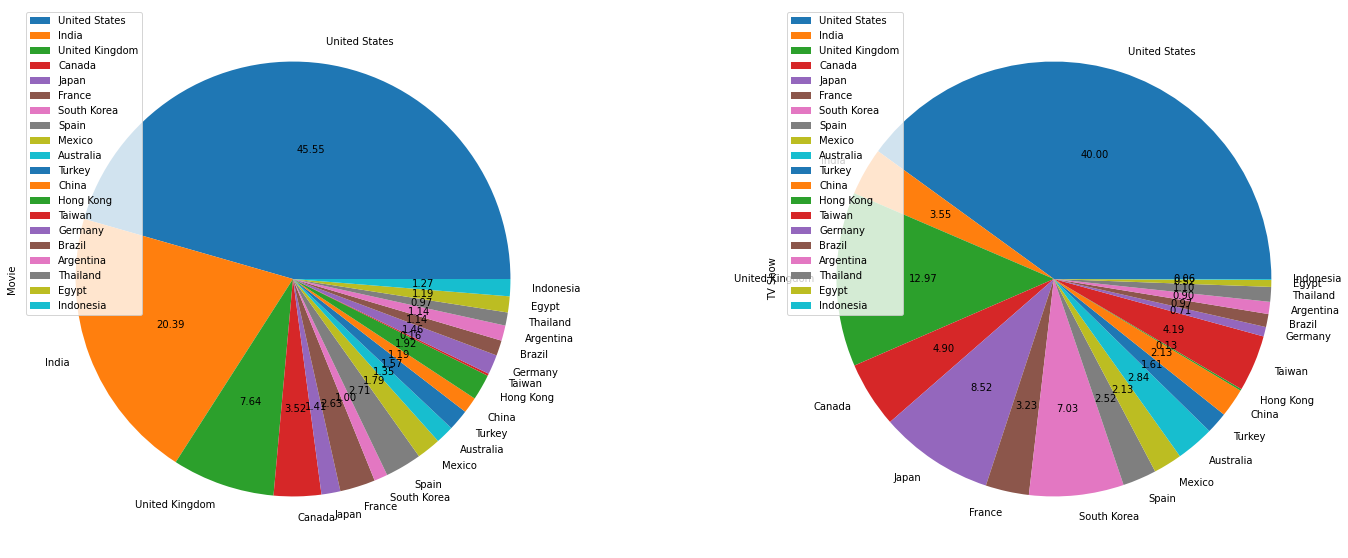

In [24]:
#Pie charts and configurations
net_pivot.plot(kind='pie', subplots=True, figsize=(25, 10),  autopct='%.2f')
plt.show()


# Seaborn
Seaborn is a Python data visualization library based on matplotlib. 

It provides a high-level interface for drawing attractive and informative statistical graphics.



In [25]:
import seaborn as sns

#Load tip data and 
tips = sns.load_dataset("tips")


In [26]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 1152x432 with 0 Axes>

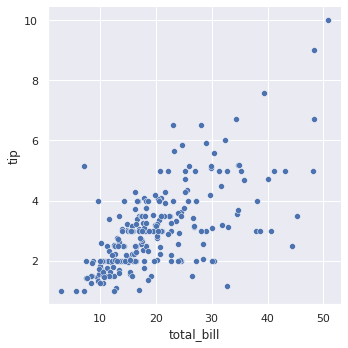

In [27]:
#Assign a style
sns.set(style="darkgrid")

# Set the width and height of the figure
plt.figure(figsize=(16,6))

sns.relplot(x='total_bill', y='tip', data=tips)


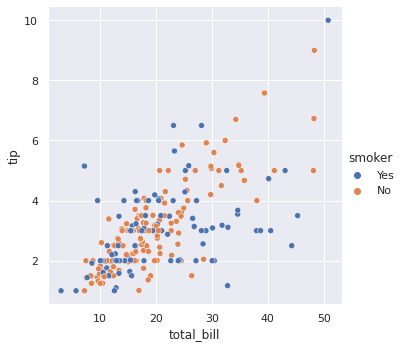

In [28]:
# We can add a third dimension with color and style
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);


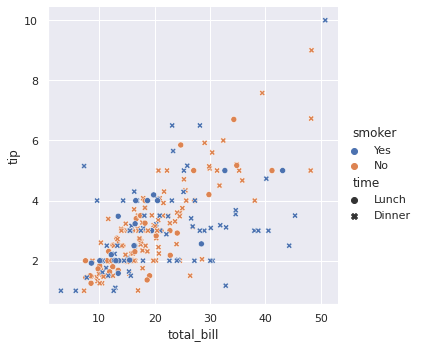

In [29]:
#Add a fourth dimension using different variables for hue and style
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)


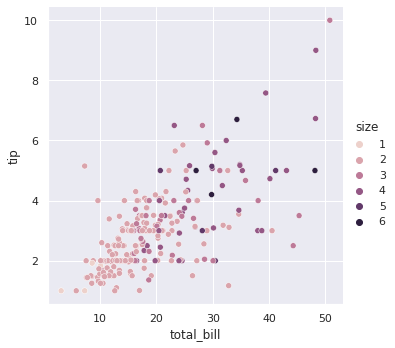

In [30]:
#Replot using size variable for hue
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)


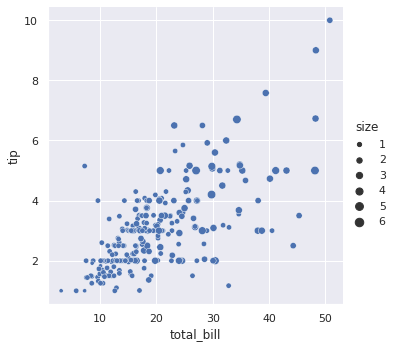

In [31]:
#The size parameter allows us to change the size of data points using variables
sns.relplot(x="total_bill", y="tip", size="size", data=tips);


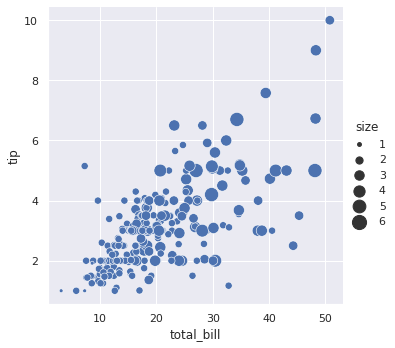

In [32]:
#The sizes parameter determines the scale of the data points
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)


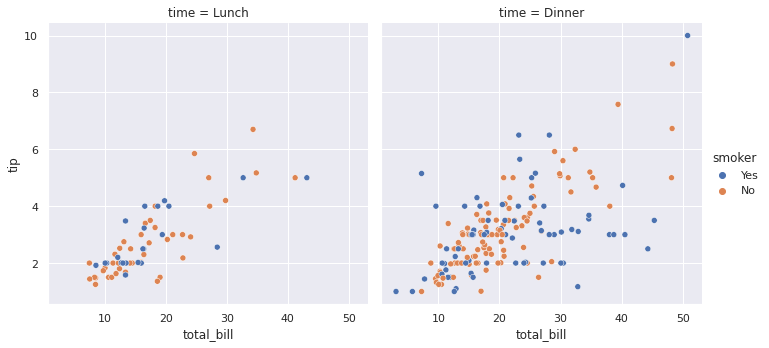

In [33]:
#The col parameter creates subplots along the provided variable
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)


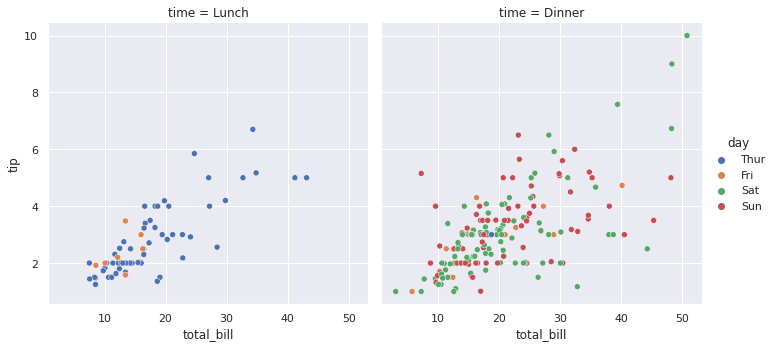

In [34]:
#Try plotting the Day of the week to see if it has an effect on the tip amount
sns.relplot(x="total_bill", y="tip", hue="day", col="time", data=tips)

#Derive one insight from the graph
#A:


In [35]:
stock_df[['AAPL', 'ABC']].head()

,AAPL,ABC
date,,
2017-01-30,121.63,83.62
2017-01-31,121.35,87.28
2017-02-01,128.75,88.61
2017-02-02,128.53,88.05
2017-02-03,129.08,89.28


In [36]:
#Create a pivot table of the tips data
hm = tips.pivot_table(index='day',columns='size',values='tip')


In [37]:
hm.head()


size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


<AxesSubplot:xlabel='size', ylabel='day'>

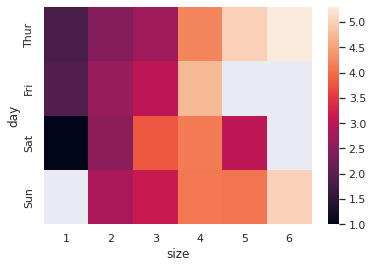

In [38]:
#An effective way to plot our pivoted data is with a heatmap
sns.heatmap(hm)
